# Pandas数据处理120题知识点总结
## 第六章 数据(分组)计算

---
  
　ID：wlong
　数据分析爱好者、目前小白一枚
　邮箱：wlong826@163.com
　CSDN：**[【数分小白龙】](https://blog.csdn.net/qq_38230663)**
　如果有不完善的地方，欢迎小伙伴评论区留言！
　最近博客、和鲸每周都会有所更新，欢迎**大家关注点赞分享**哦！
 
---

　本文的CSDN链接：[【六、数据(分组)计算】](https://blog.csdn.net/qq_38230663/article/details/116401203?spm=1001.2014.3001.5501)
	
　如果有想学习爬虫的小伙伴，可以看这里：[【零基础入门Python爬虫--豆瓣、58同城、安居客等】](https://www.heywhale.com/mw/project/60be1fa8acdcb3001707b133)

　关于总结更详细的配套习题案例，看这👉：[【和鲸训练营第一期——Pandas基础】](https://www.heywhale.com/home/competition/60c086d8565cca001731537f)

* 注：从第四章开始，就不在放数据了，重点以知识点总结为主，关于总结的配套习题，可以看这里哦！[【和鲸训练营第一期——Pandas基础】](https://www.heywhale.com/home/competition/60c086d8565cca001731537f)

## 1. 常用统计函数

In [ ]:
df['xxx'].mean() # 均值
df.mean().mean() # 全体平均数
df['xxx'].median() # 中位数
df['xxx'].var() # 方差
df['xxx'].std() # 标准差
df['xxx'].max() # 最大值
df['xxx'].min() # 最小值

## 2. diff()函数：计算上下行差值

In [ ]:
# 方法一：Series.diff()
df['xxx'].diff()
# 方法二：shift(1)
diff = df['xxx'] - df['xxx'].shift(1)

## 3. pct_change()函数：计算上下行变化率

In [ ]:
# 方法一：Series.pct_change()
df['xxx'].pct_change()
 
# 方法二：shift(1)
df['xxx']/df['xxx'].shift(1) - 1

## 4. shift()函数：将数据往后(前)移动x天

In [ ]:
shift(x)
shift(-x)

## 5. rolling()函数：以x个数据作为滑动窗口，取均值/总和

In [ ]:
df['xxx'].rolling(5).mean()
df['xxx'].rolling(10).sum()

- 应用：将收盘价5日均线、20日均线与原始数据绘制再同一个图上

In [ ]:
#方法一：
mean_5 = data['收盘价(元)'].rolling(5).mean()
mean_20 = data['收盘价(元)'].rolling(20).mean()
 
font = {'family':'MicroSoft YaHei', 'weight':'bold', 'size': 12}
matplotlib.rc('font', **font)
 
plt.rc('figure', figsize=(16,6), dpi=150) #设置图的大小
plt.plot(data['收盘价(元)'], label='原始数据')
plt.plot(mean_5, label='5日均线')
plt.plot(mean_20, label='20日均线')
 
plt.legend(loc='upper right')
plt.show()
 
#方法二：
data['收盘价(元)'].plot()
data['收盘价(元)'].rolling(5).mean().plot()
data['收盘价(元)'].rolling(20).mean().plot()

## 6. expanding()函数
- rolling()函数，是固定窗口大小，进行滑动计算，expanding()函数只设置最小的观测值数量，不固定窗口大小，实现累计计算，即不断扩展；

In [ ]:
# 计算某列的移动窗口均值：
df['xxx'].expanding(min_periods = 1).mean()

## 7. agg()函数
- 聚合函数，对分组后数据进行聚合，默认情况对分组后其他列进行聚合

### (1) 同时对xx1, xxx2两列进行计算

In [ ]:
df[['xxx1', 'xxx2']].agg([np.sum, np.mean, np.median, np.min, np.max, np.std, np.var])
df[['xxx1', 'xxx2']].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])

### (2) 对'xxx1'列求平均，对'xxx2'列求和

In [ ]:
# 方法一：分开再汇总
salary_mean = df['salary'].mean()
score_sum = df['score'].sum()
salary_mean, score_sum
 
# 方法二：agg()函数
df.agg({'xxx1' : np.sum, 'xxx2' : np.mean})

## 8. 分组计算

### (1) 根据某列元素分组后计算平均值/中位数

In [ ]:
df.groupby('xxx').mean()
df.groupby('xxx').median()

### (2) 按'xxx1'分组后，'xxx2'列元素最多的是？

In [ ]:
# 方法一：head()取行
df[['xxx1', 'xxx2']].groupby('xxx1').sum().sort_values(by='xxx2', ascending=False).head(1)
# 方法二：iloc取行
pd.DataFrame(df[['xxx1', 'xxx2']].groupby('xxx1').sum().sort_values(by='xxx2', ascending=False).iloc[0,:])
# 方法三：分组后采用agg函数求和
df[['xxx1', 'xxx2']].groupby('xxx1').agg({'xxx2':'sum'}).sort_values(by='xxx2', ascending=False).head(1)

## 9. query()函数：使用布尔表达式查询帧的列
- df.query('month == 1')等同于df[df.month==1]

### (1) 计算一月份('month ==1')的平均值

In [ ]:
df['date'] = df.index
 
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
 
january_df = df.query('month==1')  #query等同于df[df.month==1]    
january_df.mean()

### (2) 按年为频率取样

In [ ]:
df.query('month == 1 and day == 1')

### (3) 按月为频率取样

In [ ]:
df.query('day == 1')

## 10.  自定义函数修正日期

In [ ]:
def change_year(x):
    year = x.year - 100 if x.year > 1999 else x.year
    return datetime.date(year, x.month, x.day)
 
df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(change_year).astype('datetime64[ns]')
df.head()

----

# 最后附上思维导图：


![Image Name](https://cdn.kesci.com/upload/image/qus7c4wk91.png)

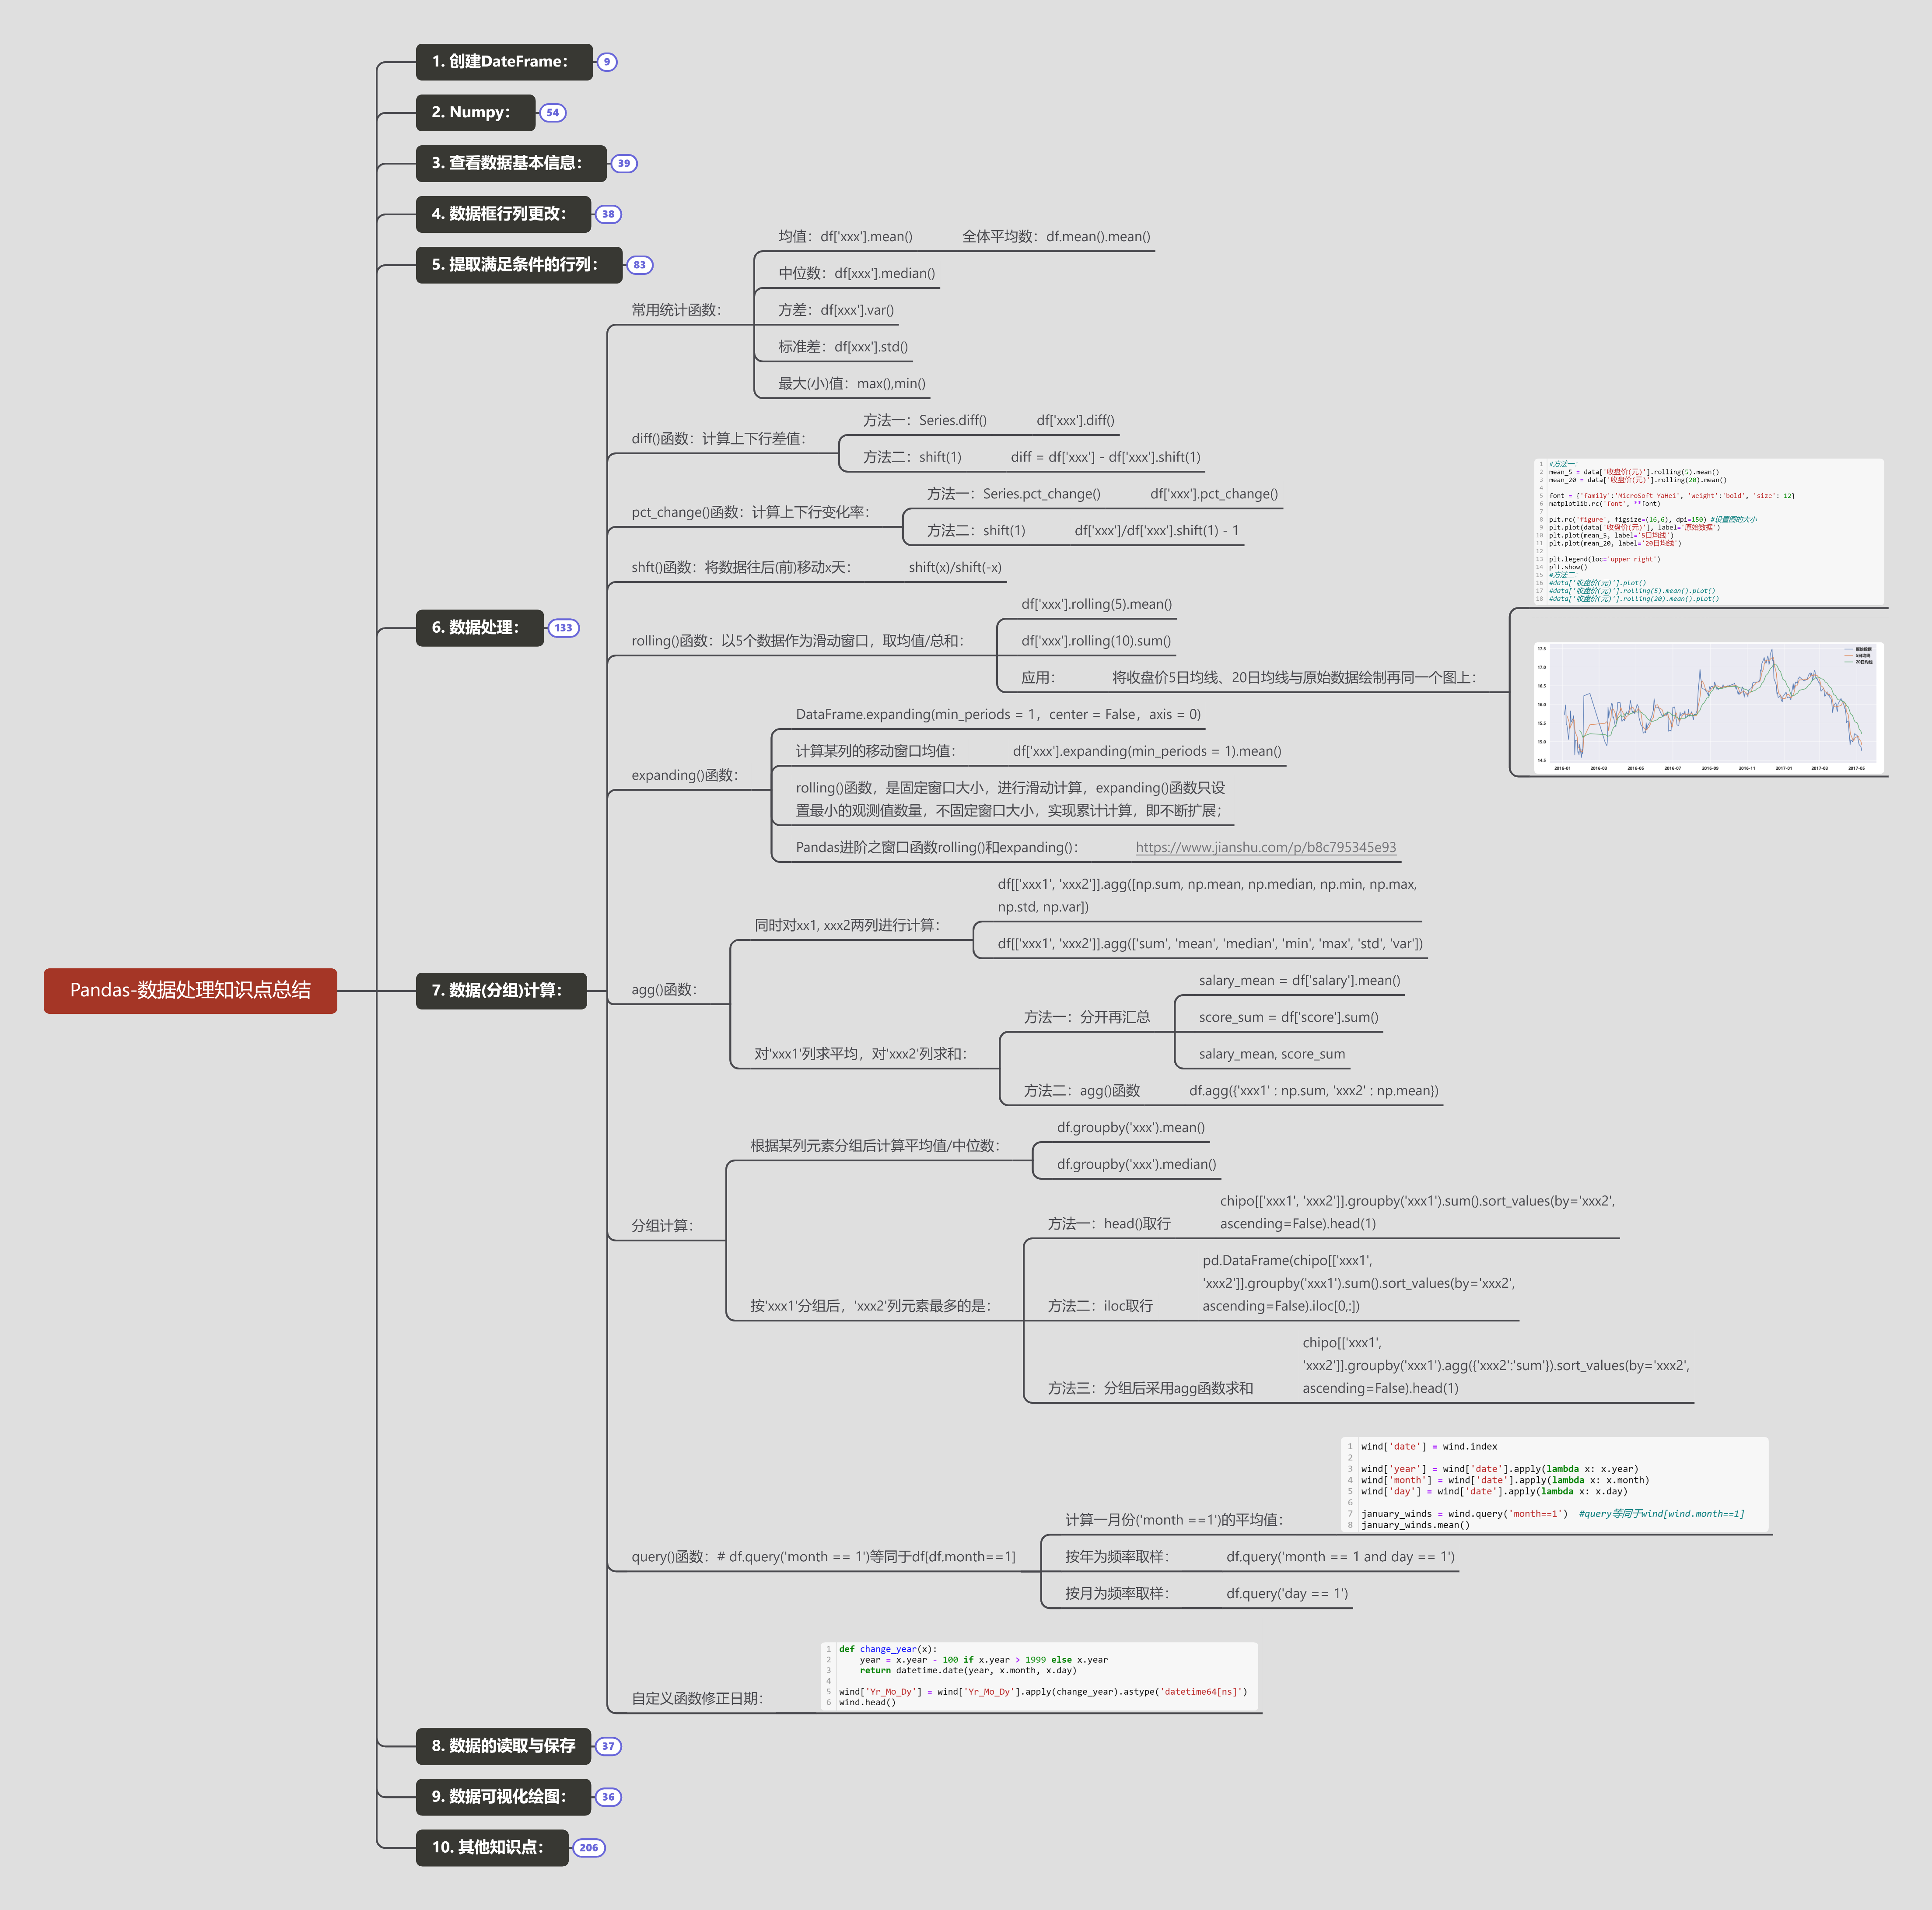